<a href="https://colab.research.google.com/github/pragatisachan/ProjectChalenge1/blob/main/BankCustomerChurnModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv")
df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
df.describe(include = 'all')

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [ ]:
df.duplicated("CustomerId").sum()

0

**Encoding**

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df.replace({'Geography' : {'France' : 2 , 'Spain' : 1 , 'Germany' : 0}} , inplace = True)


In [ ]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df.replace({'Gender' : {'Male' : 0 , 'Female' : 1}} ,  inplace = True)

In [ ]:
df["Num Of Products"].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [ ]:
df.replace({'Num Of Products' : {1 : 0 , 2 : 1 , 3 : 1 ,  4 : 1}} , inplace = True)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,2,1,42,2,0.00,0,1,1,101348.88,1
1,15647311,Hill,608,1,1,41,1,83807.86,0,0,1,112542.58,0
2,15619304,Onio,502,2,1,42,8,159660.80,1,1,0,113931.57,1
3,15701354,Boni,699,2,1,39,1,0.00,1,0,0,93826.63,0
4,15737888,Mitchell,850,1,1,43,2,125510.82,0,1,1,79084.10,0


In [ ]:
df["Has Credit Card"].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [ ]:
df["Is Active Member"].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [ ]:
df.loc[(df['Balance'] == 0.00) , 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [ ]:
df['Zero Balance'] = np.where(df['Balance'] > 0 , 1 , 0)

<Axes: >

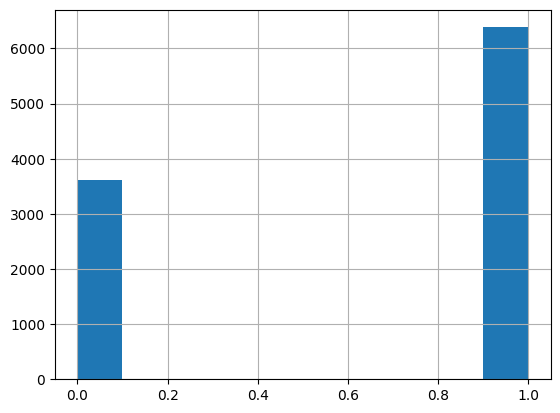

In [ ]:
df['Zero Balance'].hist()

In [ ]:
df.groupby(['Churn' , 'Geography']).value_counts()

Churn  Geography  CustomerId  Surname   CreditScore  Gender  Age  Tenure  Balance    Num Of Products  Has Credit Card  Is Active Member  Estimated Salary  Zero Balance
0      0          15565779    Kent      627          1       30   6       57809.32   0                1                0                 188258.49         1               1
                  15565796    Docherty  745          0       48   10      96048.55   0                1                0                 74510.65          1               1
                  15811314    Y?        589          1       36   9       140355.56  1                1                0                 136329.96         1               1
                  15810711    Marcum    684          0       37   4       138476.41  1                1                1                 52367.29          1               1
                  15810716    Kerr      750          0       42   8       151836.36  1                1                0                 686

**Define lable and feature**

In [ ]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [ ]:
X = df.drop(['CustomerId','Surname' , 'Churn'] , axis = 1)
y = df['Churn']

In [ ]:
X.shape , y.shape

((10000, 11), (10000,))

 **Under Sanpling**

In [ ]:
df['Churn'].value_counts()


0    7963
1    2037
Name: Churn, dtype: int64

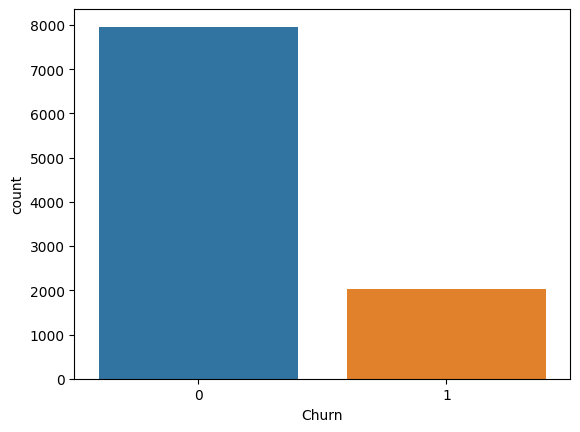

In [ ]:
sns.countplot(x = 'Churn' ,data = df);


In [ ]:
X.shape , y.shape

((10000, 11), (10000,))

**Random Under Sampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=2529)
X_rus , y_rus = rus.fit_resample(X, y)
X_rus.shape , y_rus.shape

((4074, 11), (4074,))

In [ ]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [ ]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<Axes: >

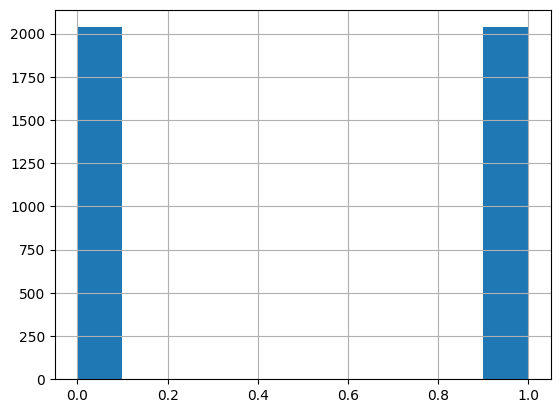

In [ ]:
y_rus.hist()

# **Random Over Sampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=2529)
X_ros , y_ros = ros.fit_resample(X, y)
X_ros.shape , y_ros.shape

((15926, 11), (15926,))

In [ ]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

<Axes: >

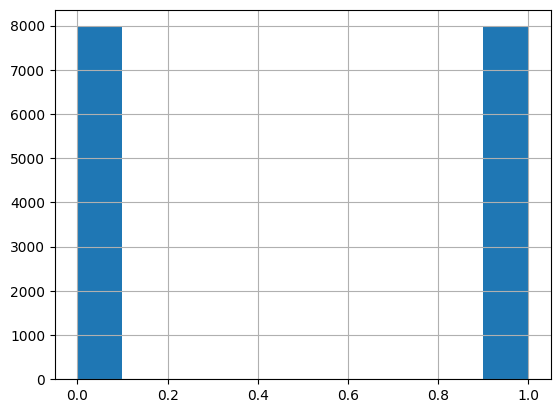

In [ ]:
y_ros.hist()

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.03 , random_state=90)
X_train
X_test
y_train
y_test

6125    0
4195    1
3673    0
5643    1
8017    0
       ..
2402    0
5207    0
316     1
2406    0
3050    1
Name: Churn, Length: 300, dtype: int64

In [ ]:
X_train_ros , X_test_ros , y_train_ros , y_test_ros = train_test_split(X_ros , y_ros , test_size = 0.03 , random_state=90)


In [ ]:
X_train_rus , X_test_rus , y_train_rus , y_test_rus = train_test_split(X_rus , y_rus , test_size = 0.03 , random_state=90)



# **Standerdize Features**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train[['CreditScore',  'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train[['CreditScore',  'Age','Tenure', 'Balance', 'Estimated Salary']])

In [ ]:
X_train_rus[['CreditScore',  'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore',  'Age','Tenure', 'Balance', 'Estimated Salary']])

In [ ]:
X_train_ros[['CreditScore',  'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore',  'Age','Tenure', 'Balance', 'Estimated Salary']])

# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train , y_train)
y_pred = svc.predict(X_test)



**Model Accuracy**

In [ ]:
from sklearn.metrics import confusion_matrix  ,  classification_report

In [ ]:
confusion_matrix(y_test , y_pred)

array([[235,   0],
       [ 65,   0]])

In [ ]:
print(classification_report(y_test , y_pred ))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       235
           1       0.00      0.00      0.00        65

    accuracy                           0.78       300
   macro avg       0.39      0.50      0.44       300
weighted avg       0.61      0.78      0.69       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_ros , y_train_ros)
y_pred_ros = svc.predict(X_test_ros)

In [ ]:
confusion_matrix(y_test_ros , y_pred_ros)

array([[  0, 250],
       [  0, 228]])

In [ ]:
print(classification_report(y_test_ros , y_pred_ros ))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       250
           1       0.48      1.00      0.65       228

    accuracy                           0.48       478
   macro avg       0.24      0.50      0.32       478
weighted avg       0.23      0.48      0.31       478



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.1 , 1 , 10] , 'gamma' : [1 , 0.1 , 0.01] , 'kernel' : ['rbf'] , 'class_weight' : ['balanced']}

In [ ]:
grid = GridSearchCV( SVC() , param_grid ,  refit=True , verbose = 2 , cv = 2 )
grid.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.7s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions = grid.predict(X_test)
confusion_matrix(y_test ,  grid_predictions)

array([[235,   0],
       [ 65,   0]])

In [ ]:
print(classification_report(y_test ,  grid_predictions))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       235
           1       0.00      0.00      0.00        65

    accuracy                           0.78       300
   macro avg       0.39      0.50      0.44       300
weighted avg       0.61      0.78      0.69       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
grid_ros = GridSearchCV( SVC() , param_grid ,  refit=True , verbose = 2 , cv = 2 )
grid_ros.fit(X_train_ros, y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   9.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   7.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   7.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   6.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   7.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.8s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   6.7s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions_ros = grid.predict(X_test_ros)
confusion_matrix(y_test_ros ,  grid_predictions_ros)

array([[250,   0],
       [228,   0]])

In [ ]:
print(classification_report(y_test_ros ,  grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.52      1.00      0.69       250
           1       0.00      0.00      0.00       228

    accuracy                           0.52       478
   macro avg       0.26      0.50      0.34       478
weighted avg       0.27      0.52      0.36       478



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
grid_rus = GridSearchCV( SVC() , param_grid ,  refit=True , verbose = 2 , cv = 2 )
grid_rus.fit(X_train_rus, y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [ ]:
grid_predictions_rus = grid.predict(X_test_rus)
confusion_matrix(y_test_rus ,  grid_predictions_rus)

array([[52,  0],
       [71,  0]])

In [ ]:
print(classification_report(y_test_rus ,  grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.42      1.00      0.59        52
           1       0.00      0.00      0.00        71

    accuracy                           0.42       123
   macro avg       0.21      0.50      0.30       123
weighted avg       0.18      0.42      0.25       123



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
